5 a 23 microgramas por decilitro (mcg/dL) pela manhã e entre 3 a 16 mcg/dL à noite

In [5]:
import mysql.connector

mydb = mysql.connector.connect(
  host="172.17.0.2",
  user="root",
  password="root",
  database="cortisol"
)
cursor = mydb.cursor()
print(mydb)


In [ ]:

mycursor = mydb.cursor()

sql = "INSERT INTO customers (name, address) VALUES (%s, %s)"
val = ("John", "Highway 21")
mycursor.execute(sql, val)

mydb.commit()

print(mycursor.rowcount, "record inserted.")

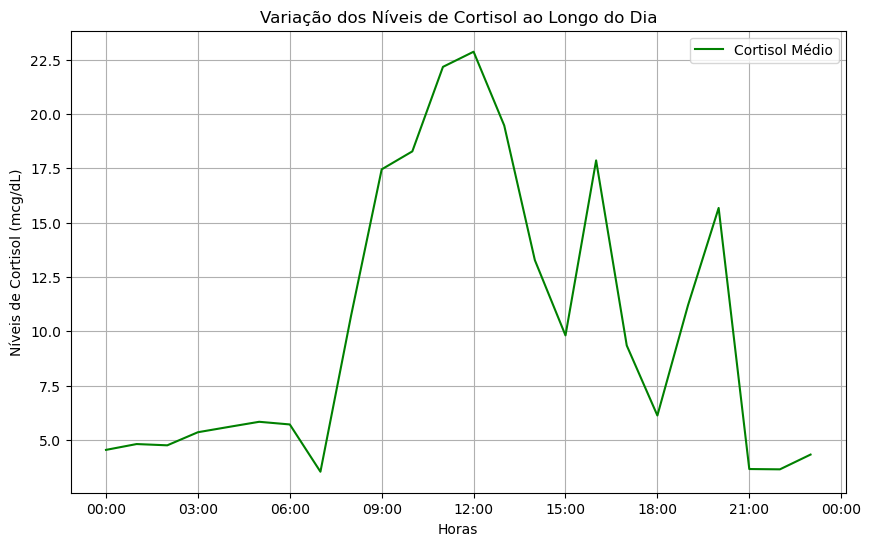

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import random

horas = list(range(24))

cortisol_medio = []
for hora in horas:
    if hora < 8 or hora > 20:  # Noite
        cortisol = random.uniform(3, 6)
    else:  # Dia
        cortisol = random.uniform(6, 23)
    cortisol_medio.append(cortisol)

    data_hora = datetime(2024, 1, 1, hora, 0)  

    sql = "INSERT INTO dados (dado_cortisol, data_horario) VALUES (%s, %s)"
    valores = (cortisol, data_hora)

    cursor.execute(sql, valores)

mydb.commit()

cursor.close()
mydb.close()


# Convertendo as horas para o formato de data/hora
horas_formatadas = [datetime(2024, 1, 1, hora, 0) for hora in horas]

plt.figure(figsize=(10, 6))
plt.plot(horas_formatadas, cortisol_medio, label='Cortisol Médio', color='green')

# Formatando o eixo x como horas
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.xlabel('Horas')
plt.ylabel('Níveis de Cortisol (mcg/dL)')
plt.title('Variação dos Níveis de Cortisol ao Longo do Dia')

plt.legend()
plt.grid(True)

plt.show()


create database cortisol;

use cortisol;

CREATE TABLE dados (
    id INT PRIMARY KEY AUTO_INCREMENT,
    dado_cortisol decimal(10,2),
    data_horario DATETIME
);

